In [1]:
import pandas as pd

# Load the cleaned dataset
valorant_data = pd.read_csv("datasets/cleaned_valorant_data.csv")

# Verify the dataset
print(valorant_data.head())

   Match Number  Round Number  Eco before purchase Drop Given to Teammate  \
0             1             1                  800                   none   
1             1             2                 3500                   none   
2             1             3                 3250                   none   
3             1             4                 4150                   none   
4             1             5                 3450                   none   

   Eco after purchase sidearms main weapon Shield type Friendly drop weapon  \
0                 100    ghost        none        none                 none   
1                  50    ghost    guardian       heavy                 none   
2                2250  classic        none       heavy             Guardian   
3                  50  classic      vandal       heavy                 none   
4                3050  classic      vandal       heavy                 none   

   Contingency Ability  Undercut Ability  kills round win/loss

In [2]:
# Add Economy Tier column
def classify_economy(eco):
    if eco <= 1500:
        return "low"
    elif eco <= 4000:
        return "medium"
    else:
        return "high"

valorant_data["Economy Tier"] = valorant_data["Eco before purchase"].apply(classify_economy)

# Verify the new column
print(valorant_data[["Eco before purchase", "Economy Tier"]].head())

   Eco before purchase Economy Tier
0                  800          low
1                 3500       medium
2                 3250       medium
3                 4150         high
4                 3450       medium


In [3]:
import random

# Add Total Utilities Used column
def calculate_utilities(row):
    # Base values for utilities
    base_undercut = 0.6
    base_contingency = 0.4
    
    # Adjust based on economy and round outcome
    multiplier = 1.0
    if row["round win/loss"] == "win":
        multiplier += 0.2  # More utility usage in winning rounds
    if row["Eco before purchase"] < 1500:
        multiplier -= 0.2  # Reduced usage in low-economy rounds
    
    # Add randomness to simulate real-world variability
    undercut_usage = base_undercut * multiplier + random.uniform(-0.1, 0.1)
    contingency_usage = base_contingency * multiplier + random.uniform(-0.1, 0.1)
    
    # Total Utilities Used
    return round(undercut_usage + contingency_usage, 2)

valorant_data["Total Utilities Used"] = valorant_data.apply(calculate_utilities, axis=1)

# Verify the new column
print(valorant_data[["Contingency Ability", "Undercut Ability", "Total Utilities Used"]].head())

   Contingency Ability  Undercut Ability  Total Utilities Used
0                    1                 0                  1.14
1                    0                 1                  1.35
2                    0                 1                  0.95
3                    1                 1                  1.17
4                    1                 2                  1.29


In [4]:
def classify_round_with_save(row):
    if row["Round Number"] in [1, 13]:
        return "pistol"
    elif row["Eco before purchase"] <= 1500:
        return "eco"
    elif row["Eco after purchase"] >= row["Eco before purchase"] - 200:  # No significant spending
        return "save"
    elif row["Eco before purchase"] > 1500 and row["Eco before purchase"] <= 4000:
        return "mid buy"
    else:
        return "full buy"

valorant_data["Round Type"] = valorant_data.apply(classify_round_with_save, axis=1)

# Verify the updated classifications
print(valorant_data[["Round Number", "Eco before purchase", "Eco after purchase", "main weapon", "Shield type", "Round Type"]].tail(10))

    Round Number  Eco before purchase  Eco after purchase main weapon  \
56            13                  800                 100        none   
57            14                 3700                   0      vandal   
58            15                 3200                 550    guardian   
59            16                 3550                2550      vandal   
60            17                 4850                3300     marshal   
61            18                 6700                2200      vandal   
62            19                 4100                 200      vandal   
63            20                 2600                2600        none   
64            21                 5500                1600      vandal   
65            22                 4900                 400      vandal   

   Shield type Round Type  
56       light     pistol  
57       light    mid buy  
58       light    mid buy  
59       heavy    mid buy  
60       light   full buy  
61       heavy   full buy  


In [5]:
valorant_data

,Match Number,Round Number,Eco before purchase,Drop Given to Teammate,Eco after purchase,sidearms,main weapon,Shield type,Friendly drop weapon,Contingency Ability,Undercut Ability,kills,round win/loss,match status,Side,Economy Tier,Total Utilities Used,Round Type
0,1,1,800,none,100,ghost,none,none,none,1,0,2,win,defeat,defenders,low,1.14,pistol
1,1,2,3500,none,50,ghost,guardian,heavy,none,0,1,1,win,defeat,defenders,medium,1.35,mid buy
2,1,3,3250,none,2250,classic,none,heavy,Guardian,0,1,0,loss,defeat,defenders,medium,0.95,mid buy
3,1,4,4150,none,50,classic,vandal,heavy,none,1,1,2,win,defeat,defenders,high,1.17,full buy
4,1,5,3450,none,3050,classic,vandal,heavy,none,1,2,2,win,defeat,defenders,medium,1.29,mid buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3,18,6700,none,2200,classic,vandal,heavy,none,1,2,0,loss,defeat,defenders,high,1.02,full buy
62,3,19,4100,none,200,classic,vandal,heavy,none,1,2,0,loss,defeat,defenders,high,1.03,full buy
63,3,20,2600,none,2600,classic,none,none,none,1,2,0,loss,defeat,defenders,medium,0.96,save
64,3,21,5500,none,1600,classic,vandal,heavy,none,1,2,2,loss,defeat,defenders,high,0.97,full buy


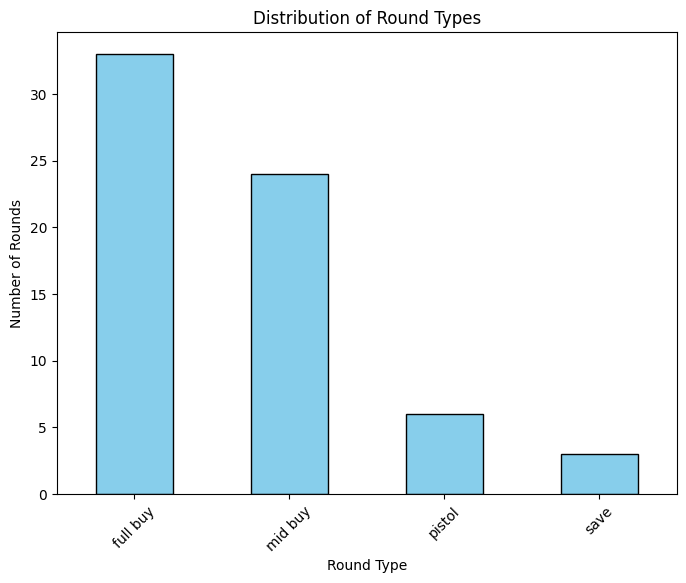

In [6]:
import matplotlib.pyplot as plt

round_type_counts = valorant_data["Round Type"].value_counts()

plt.figure(figsize=(8, 6))
round_type_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Round Types")
plt.xlabel("Round Type")
plt.ylabel("Number of Rounds")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

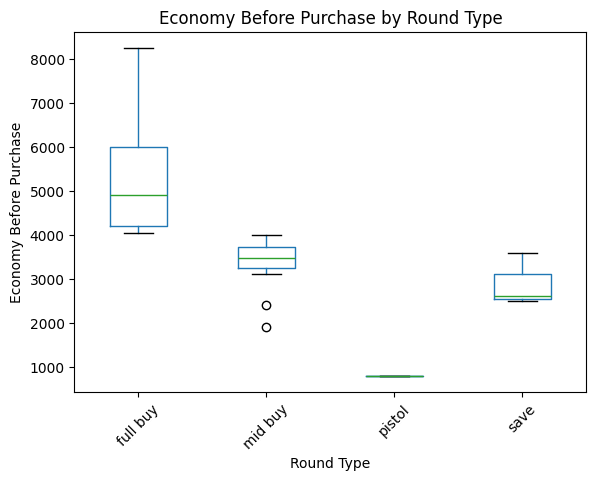

In [7]:
# Boxplot of Economy by Round Type
plt.figure(figsize=(10, 6))
valorant_data.boxplot(column="Eco before purchase", by="Round Type", grid=False)
plt.title("Economy Before Purchase by Round Type")
plt.suptitle("")
plt.xlabel("Round Type")
plt.ylabel("Economy Before Purchase")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

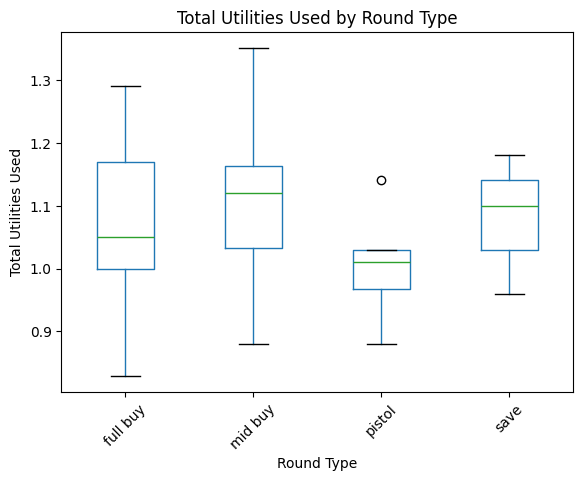

In [8]:
# Boxplot of Utility Usage by Round Type
plt.figure(figsize=(10, 6))
valorant_data.boxplot(column="Total Utilities Used", by="Round Type", grid=False)
plt.title("Total Utilities Used by Round Type")
plt.suptitle("")
plt.xlabel("Round Type")
plt.ylabel("Total Utilities Used")
plt.xticks(rotation=45)
plt.show()

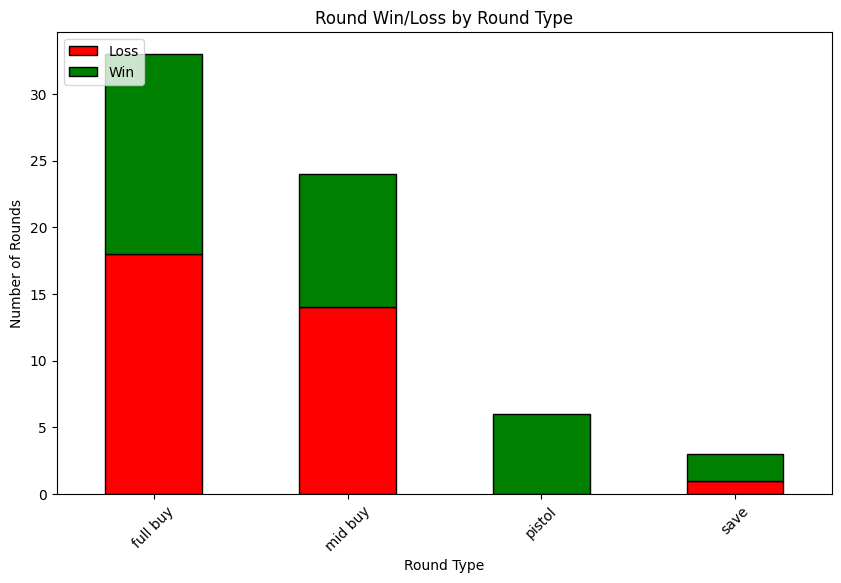

In [9]:
# Stacked bar chart of win/loss by Round Type
round_outcomes = valorant_data.groupby(["Round Type", "round win/loss"]).size().unstack()

round_outcomes.plot(kind="bar", stacked=True, figsize=(10, 6), color=["red", "green"], edgecolor="black")
plt.title("Round Win/Loss by Round Type")
plt.xlabel("Round Type")
plt.ylabel("Number of Rounds")
plt.xticks(rotation=45)
plt.legend(["Loss", "Win"], loc="upper left")
plt.show()

In [10]:
# Save the updated dataset with new features for recsyss
valorant_data.to_csv("valorant_model_dataset.csv", index=False)
print("Updated dataset saved as 'valorant_model_dataset.csv'")

Updated dataset saved as 'valorant_model_dataset.csv'
